In [411]:

import importlib
import modules
from collections import Counter
import numpy as np
import powerlaw
import importlib
import pickle
import sys
import cellpylib as cpl
import matplotlib.pyplot as plt
import random
import sys

importlib.reload(modules)


<module 'modules' from '/Users/carokluin/Documents/CSM/ComplexSystems/Project_complexsystems/CSS-Group1/modules.py'>

# Jam Size Distribution NaSch without dynamics

In [412]:

sys.setrecursionlimit(10000)

#Critical densities (5) from data file for p_slowdown and vmax fixed 
#0.4482758620689655,3,"[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2413793103448276, 0.22068965517241382, 0.2, 0.2]

p = 0.22068965517241382
L = 300
T = int(L/2)
n = 1

# NaSch parameters
p_slowdown = 0.4482758620689655
v_max = 3

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01
dynamic_model=False
return_evolutions=True
current_state = modules.initial_state_nasch(L=L, p=p, v_max=v_max)

evolution = modules.nasch_step(current_state, v_max=v_max, p_slowdown=p_slowdown, 
                       dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size, 
                       entry_chance=entry_chance, exit_chance=exit_chance)

lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown,return_evolutions=return_evolutions, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)




#To save data in file for plot
#file = open('Results/loglog_jam_nondynamic_critical.txt', 'wb')
#pickle.dump(jam_size_counter, file)
#file.close()

## Visualize Jam Size distribution in log log plot and check for powerlaw (no dynamics)

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.0000)
1.9312769406656582


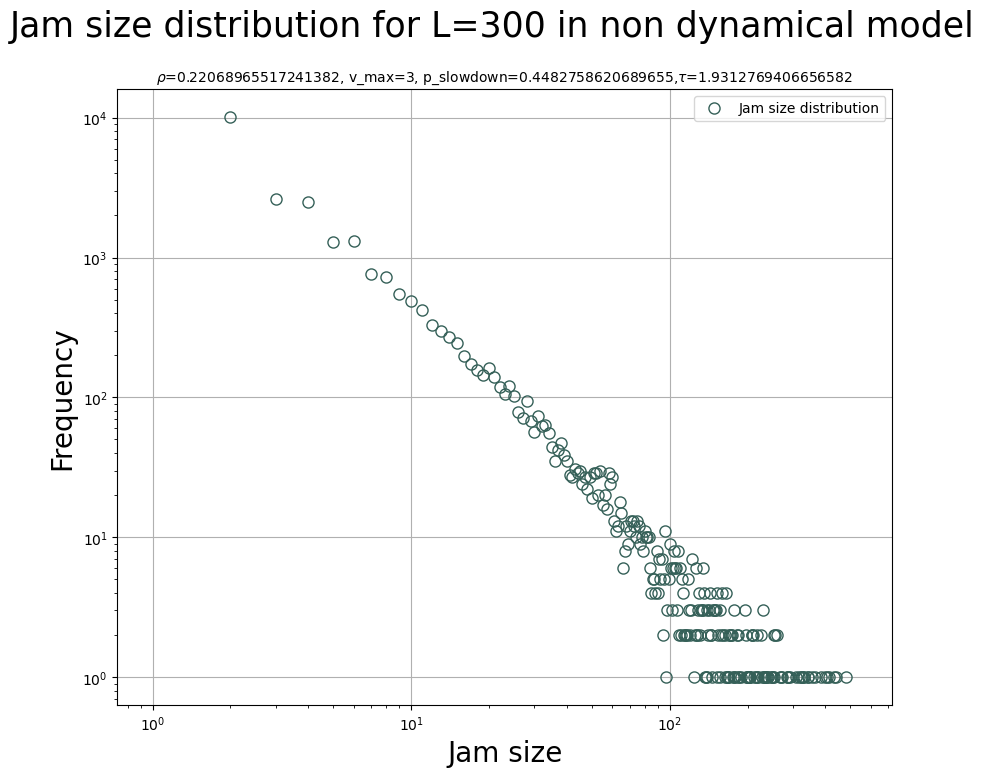

In [413]:
file = open('Results/loglog_jam_nondynamic_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

result, exponent = modules.analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)
 

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o', markerfacecolor='none', markeredgecolor='#356058', markersize=8)

plt.legend(['Jam size distribution'])
plt.grid()
plt.title(f'$\\rho$={p}, v_max={v_max}, p_slowdown={p_slowdown},$\\tau$={exponent} ', fontsize=10)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle(f'Jam size distribution for L={L} in non dynamical model', fontsize=25)
plt.show()

# Jam Size Distribution NaSch With Dynamics 

In [414]:
p = 0.2
L = 300
T = int(L/2)
n = 1

# NaSch parameters
p_slowdown = 0.4
v_max = 3

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01

dynamic_model = True
return_evolutions=True

current_state = modules.initial_state_nasch(L=L, p=p, v_max=v_max)

evolution = modules.nasch_step(current_state, v_max=v_max, p_slowdown=p_slowdown, 
                       dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size, 
                       entry_chance=entry_chance, exit_chance=exit_chance)

lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown,return_evolutions=return_evolutions, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)




#To save data in file for plot
#file = open('Results/loglog_jam_dynamic_critical.txt', 'wb')
#pickle.dump(jam_size_counter, file)
#file.close()

## Visualize Jam Size distribution in log log plot and check for powerlaw (dynamics)

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.0000)
1.760266533033647


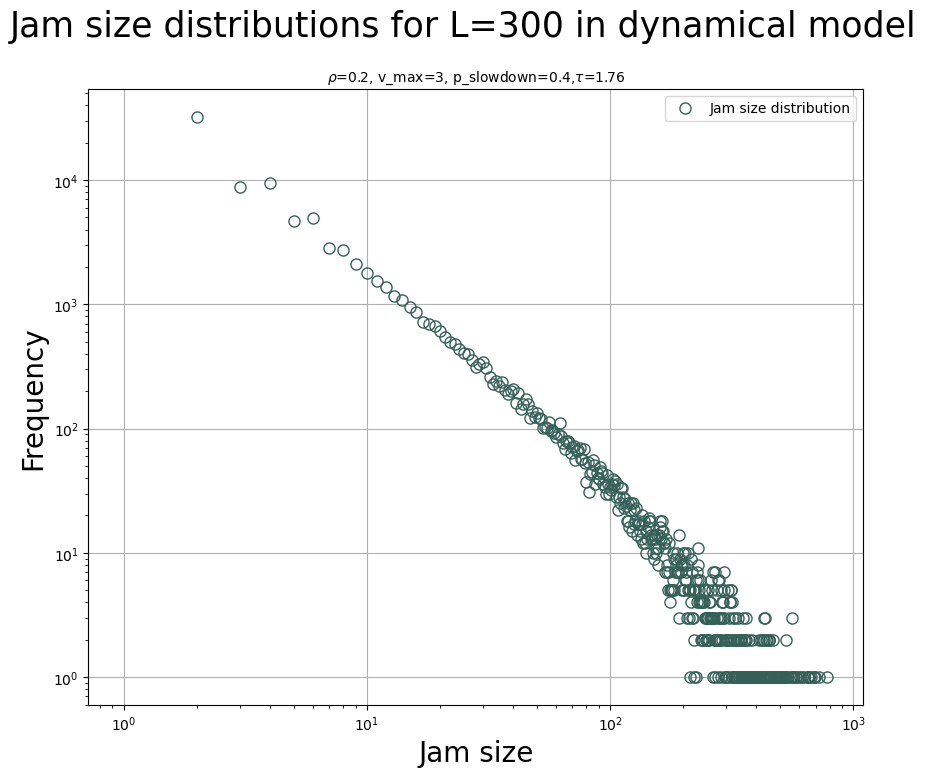

In [415]:
file = open('Results/loglog_jam_dynamic_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

result, exponent = modules.analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o', markerfacecolor='none', markeredgecolor='#356058', markersize=8)
plt.legend(['Jam size distribution'])
plt.grid()
plt.title(f'$\\rho$={p}, v_max={v_max}, p_slowdown={p_slowdown},$\\tau$={round(exponent,2)}', fontsize=10)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle(f'Jam size distributions for L={L} in dynamical model', fontsize=25)
plt.show()

# Jam Size Distribution CA (p_slowdown=0, vmax=1)


In [416]:
sys.setrecursionlimit(10000)

p = 0.22068965517241382
L = 300
T = int(L/2)
n = 1

# NaSch parameters
p_slowdown = 0 
v_max = 1 

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01

dynamic_model=False

return_evolutions=True

current_state = modules.initial_state_nasch(L=L, p=p, v_max=v_max)

evolution = modules.nasch_step(current_state, v_max=v_max, p_slowdown=p_slowdown, 
                       dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size, 
                       entry_chance=entry_chance, exit_chance=exit_chance)

lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                      return_evolutions=return_evolutions, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)




#To save data in file for plot
#file = open('Results/loglog_jam_CA_critical.txt', 'wb')
#pickle.dump(jam_size_counter, file)
#file.close()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/carokluin/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/y2/4b7d_vjj5d70m77w1bxwqw640000gn/T/ipykernel_80483/3403995572.py", line 27, in <module>
    lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown,
                                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/carokluin/Documents/CSM/ComplexSystems/Project_complexsystems/CSS-Group1/modules.py", line 327, in run_model_stochastic
    assert isinstance(p_slowdown, float) and 0 <= p_slowdown <= 1,  "The given slowing down probability p_slowdown should be a float between 0 and 1"
                                             ^^^^^^^^^^^^^^^^^^^^
AssertionError: The given slowing down probability p_slowdown sh

## Visualize Jam Size distribution in log log plot and check for powerlaw (CA)

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.9854)
4.216223386113601


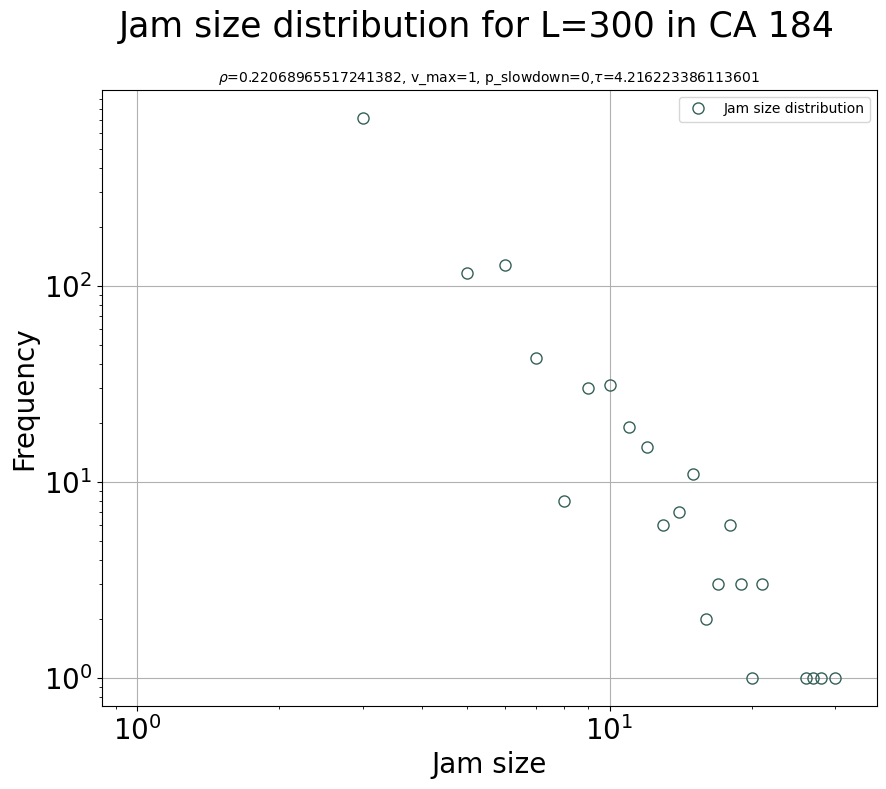

In [417]:
file = open('Results/loglog_jam_CA_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

#check for powerlaw and make loglog plot for visualisation
result, exponent = modules.analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o', markerfacecolor='none', markeredgecolor='#356058', markersize=8)

#line to plot the critical exponent line in the plot 
#plt.loglog(range(1, int(max(jam_size_counter.keys()))), power(range(1, int(max(jam_size_counter.keys()))), exponent), '--')
plt.legend(['Jam size distribution'])
plt.grid()
plt.title(f'$\\rho$={p}, v_max={v_max}, p_slowdown={p_slowdown},$\\tau$={exponent} ', fontsize=10)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.suptitle(f'Jam size distribution for L={L} in CA 184', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Analyze powerlaw of the dynamic exponent of the NaSch traffic flow

In [423]:

L = 100
T = int(L/2)
n = 1

# NaSch parameters
p_slowdown = 0.3157894736842105
v_max = 3

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.1
exit_chance = 0.1
dynamic_model=True
return_evolutions=True

p_value = np.linspace(0.1, 0.9, 9)

for p in p_value: 
    current_state = modules.initial_state_nasch(L=L, p=p, v_max=v_max)

    evolution = modules.nasch_step(current_state, v_max=v_max, p_slowdown=p_slowdown, 
                        dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size, 
                        entry_chance=entry_chance, exit_chance=exit_chance)

    lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown,return_evolutions=return_evolutions, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size,
                                                                        entry_chance=entry_chance, exit_chance=exit_chance)

    result_jam_test = modules.analyze_powerlaw_distribution(list(jam_size_counter.elements()))
    
    print ("for initial density:", p) 
    print(result_jam_test) #print result of power law test
    

Calculating best minimal value for power law fit
for initial density: 0.1
('Data prefers power_law over exponential (p-value: 0.0175)', 1.6994274231994195)
Calculating best minimal value for power law fit
for initial density: 0.2
('Data prefers power_law over exponential (p-value: 0.0000)', 1.7293761357744426)
Calculating best minimal value for power law fit
for initial density: 0.30000000000000004
('Data prefers power_law over exponential (p-value: 0.0675)', 2.1147688439929127)
Calculating best minimal value for power law fit
for initial density: 0.4
('Data prefers power_law over exponential (p-value: 0.0600)', 2.361525395147242)
Calculating best minimal value for power law fit
for initial density: 0.5
('Data prefers power_law over exponential (p-value: 0.1767)', 2.153734357101781)
Calculating best minimal value for power law fit
for initial density: 0.6
('Data prefers power_law over exponential (p-value: 0.0000)', 1.7184729694139942)
Calculating best minimal value for power law fit
f

# Relationship between critical exponent and initial density for dynamical model

In [419]:

sys.setrecursionlimit(50000)

# A power-law distribution for a given initial density
def analyze_critical_exponent_for_density(p, L, T, n_repetitions, v_max, p_slowdown, triangular, dynamic_model, neighbourhood_size, entry_chance, exit_chance):
    """Function that saves the critical exponent for a initial density."""

    # Nasch model
    lifespan_counter, jam_counter = modules.run_model_stochastic(p, L, T, n_repetitions, v_max, p_slowdown, triangular, return_evolutions=False, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size, entry_chance=entry_chance, exit_chance=exit_chance)
    
    # Previous defined analyze_powerlaw_distribution function 
    result, exponent = modules.analyze_powerlaw_distribution(list(jam_counter.elements()))
    
    return p, exponent

# Parameters
L = 100
T = int(L/2)
n_repetitions = 1
v_max = 3
p_slowdown = 0.8
triangular = False
dynamic_model = True
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01

# Initial Densities 
initial_densities = np.linspace(0.1, 0.85, 100)

# Collect Results
results = [analyze_critical_exponent_for_density(p, L, T, n_repetitions, v_max, p_slowdown, triangular, dynamic_model, neighbourhood_size, entry_chance, exit_chance) for p in initial_densities]

# Unpack Results
densities, exponents = zip(*results)


#save plot
#file = open('Results/densities_density_dynamic_pslow08.txt', 'wb')
#pickle.dump(results, file)
#file.close()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

# pslowdown = 0.8

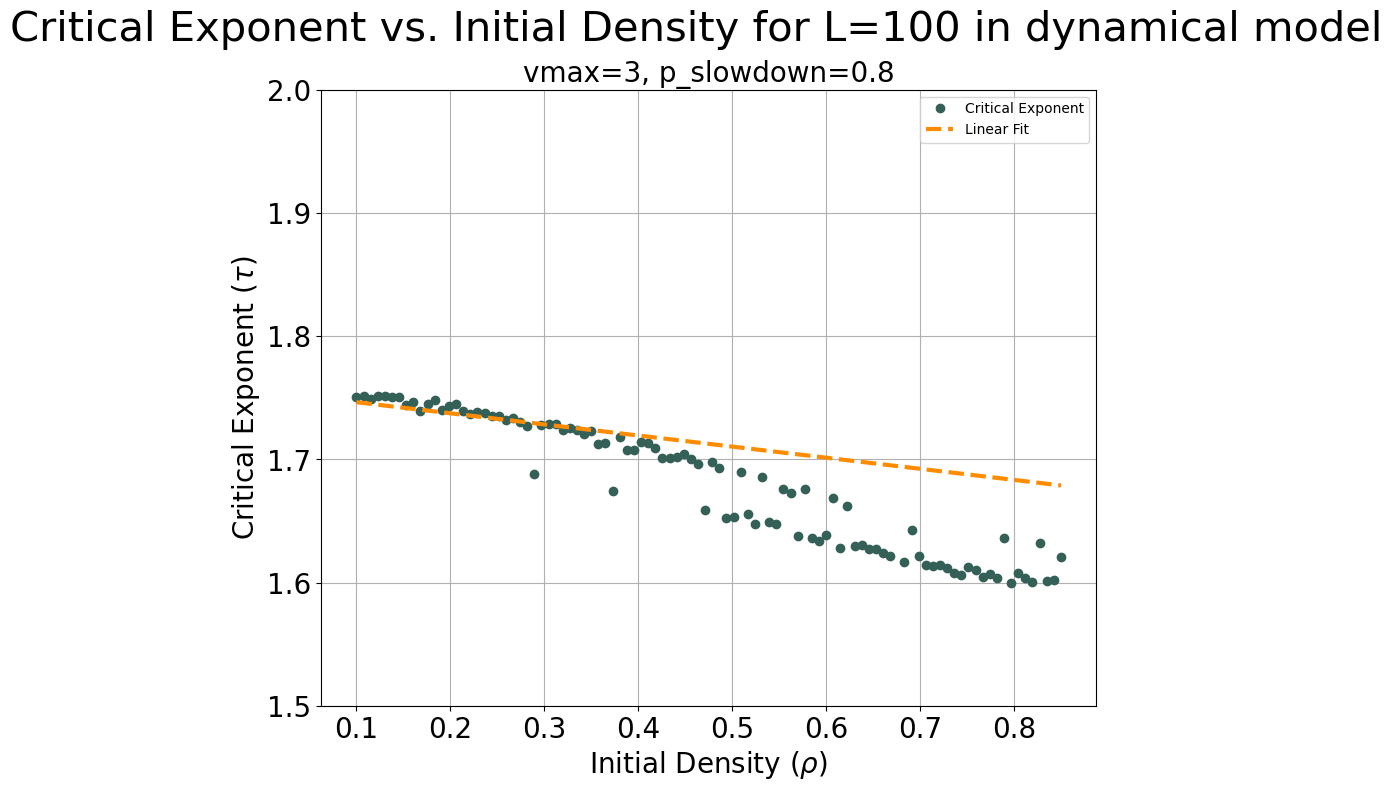

In [420]:
# Visualize Results
file = open('Results/densities_density_dynamic_pslow08.txt', 'rb')
results = pickle.load(file)

# Unpack Results
densities, exponents = zip(*results)

# Perform linear regression
fit_params = np.polyfit(densities, exponents, 1)
fit_line = np.polyval(fit_params, densities)

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(densities, exponents, 'o', color='#356058',linewidth=3,label='Critical Exponent')
plt.plot(densities, fit_line, '--', color='darkorange', linewidth=3, label='Linear Fit')
plt.xlabel('Initial Density ($\\rho$)', fontsize=20)
plt.ylabel('Critical Exponent ($\\tau$)', fontsize=20)
plt.title(f'vmax={v_max}, p_slowdown={p_slowdown}', fontsize=20)
plt.suptitle(f'Critical Exponent vs. Initial Density for L={L} in dynamical model', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(1.5,2)
plt.legend()
plt.show()


# pslowdown = 0.2

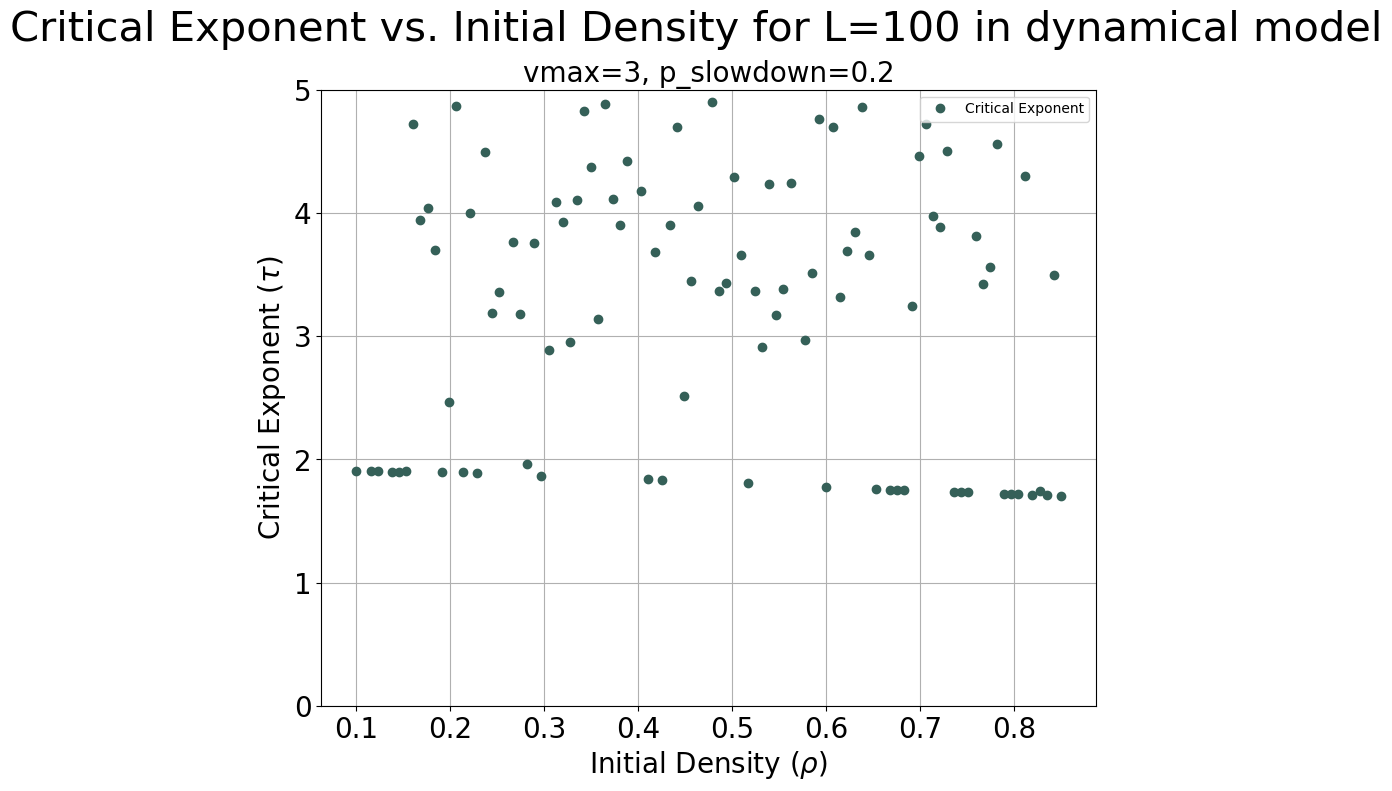

In [421]:
# Visualize Results
file = open('Results/densities_density_dynamic_pslow02.txt', 'rb')
results = pickle.load(file)

# Unpack Results
densities, exponents = zip(*results)

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(densities, exponents, 'o', color='#356058',linewidth=3,label='Critical Exponent')
plt.xlabel('Initial Density ($\\rho$)', fontsize=20)
plt.ylabel('Critical Exponent ($\\tau$)', fontsize=20)
plt.title(f'vmax={3}, p_slowdown={0.2}', fontsize=20)
plt.suptitle(f'Critical Exponent vs. Initial Density for L={L} in dynamical model', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,5)
plt.legend()
plt.show()